In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from sauron_colormap import sauron
import math
from mpl_toolkits.axes_grid.inset_locator import inset_axes

<ipython-input-1-10703b6e8f91>:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


In [2]:
plt.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams.update({'font.size': 10})
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 12;
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = 10;
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2;
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5;
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1;
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in';
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
params = {'mathtext.default': 'regular'}
plt.rcParams.update(params)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.top']=True

In [3]:
def mod_black_body(M,T,v,v0,D,b):
    d=D*3.0856e22
    m=M*2e30
    c=3e8
    h=6.626e-34
    kb=1.38e-23
    B=((2*h*v**3/c**2)*1/(np.exp(h*v/(kb*T))))
    k0=0.051
    k=k0*((v/v0)**b)
    S=(k*B*m/(d**2))
    sj=S/1e-26
    return sj

In [4]:
def power_law(a,p,K):
    B=(K*(a/1e10)**p)
    return B

In [5]:
def combined(p,K,M,T,v,v0,D,b):
    com=power_law(v,p,K)+mod_black_body(M,T,v,v0,D,b)
    return com

In [6]:
def plotter(p,k,M,T,D,b,LSB,LSBfr,USB,USBfr,SEDfl,SEDfr,x0,y0,h,w,SEDerror,LSBerr,USBerr):
    fig,ax=plt.subplots(figsize=[15,8])
    rfreq=np.logspace(7,12,100)
    dfreq=np.logspace(10,13,100)
    ffreq=np.logspace(7,13,100)
    pl=power_law(rfreq,p,k)
    plmjy=pl/1e-3
    dust=mod_black_body(M,T,dfreq,6e11,D,b)
    dustmjy=dust/1e-3
    com=combined(p,k,M,T,ffreq,6e11,D,b)
    commjy=com/1e-3
    SEDflmjy=SEDfl/1e-3
    SEDerrmjy=SEDerror/1e-3
    LSBmjy=LSB/1e-3
    USBmjy=USB/1e-3
    LSBerrmjy=LSBerr/1e-3
    USBerrmjy=USBerr/1e-3
    plt.loglog(dfreq,dustmjy,color='green',zorder=2)
    plt.loglog(rfreq,plmjy,color='red',zorder=3)
    plt.loglog(ffreq,commjy,color='orchid',zorder=4)
    plt.loglog(LSBfr,LSBmjy,'*',markersize=12,color='orange',zorder=6)
    plt.loglog(USBfr,USBmjy,'*',markersize=12,color='green',zorder=7)
    plt.errorbar(LSBfr,LSBmjy,yerr=LSBerrmjy,fmt='none',ecolor='black')
    plt.errorbar(USBfr,USBmjy,yerr=USBerrmjy,fmt='none',ecolor='black')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Flux Density (mJy)')
    plt.ylim(1e-4)
    plt.loglog(SEDfr,SEDflmjy,'o',zorder=8)
    plt.errorbar(SEDfr,SEDflmjy,yerr=SEDerrmjy,fmt='none',ecolor='black')
    plt.xscale('log')
    plt.yscale('log')
    axins=fig.add_axes([x0,y0,h,w])
    almafl=[LSBmjy,USBmjy]
    almafr=[LSBfr,USBfr]
    axins.plot(almafr,almafl,color='black')
    axins.plot(LSBfr,LSBmjy,'*',markersize=12,color='orange')
    axins.plot(USBfr,USBmjy,'*',markersize=12,color='green')
    axins.errorbar(LSBfr,LSBmjy,yerr=LSBerrmjy,fmt='none',ecolor='black')
    axins.errorbar(USBfr,USBmjy,yerr=USBerrmjy,fmt='none',ecolor='black')
    ax.indicate_inset_zoom(axins,edgecolor='black')

In [18]:
data=pd.read_csv('Documents/SED.csv')
plot=pd.read_csv('Documents/Plot.csv')

In [19]:
i=33
index=np.array(plot['Index'])
inter=np.array(plot['Intercept'])
mass=np.array(plot['Mass'])
temp=np.array(plot['Temp'])
dist=np.array(plot['Distance'])
beta=np.array(plot['Beta'])
c=3e5
H0=70
z=(dist[i]/c)*H0
LSBfl=np.array(plot['LSB Flux'])
LSBfr=np.array(plot['LSB Freq'])
LSBfre=(1+z)*LSBfr
LSBerr=np.array(plot['LSB RMS'])
USBfl=np.array(plot['USB Flux'])
USBfr=np.array(plot['USB Freq'])
USBfre=(1+z)*USBfr
USBerr=np.array(plot['USB RMS'])
SEDflux=plot['SED Flux']
SEDfreq=plot['SED Freq']
SEDerr=np.array(plot['SED RMS'])
SEDy=np.array(data[SEDflux[i]])
SEDx=np.array(data[SEDfreq[i]])
SEDxe=(1+z)*SEDx
SEDrms=np.array(data[SEDerr[i]])
x0=np.array(plot['x0'])
y0=np.array(plot['y0'])
h=np.array(plot['h'])
w=np.array(plot['w'])
mm=np.array(plot['1mm flux density (Jy)'])
mmfr=np.array(plot['1mm frequency (Hz)'])
mmfre=(1+z)*mmfr
mmrms=np.array(plot['RMS'])

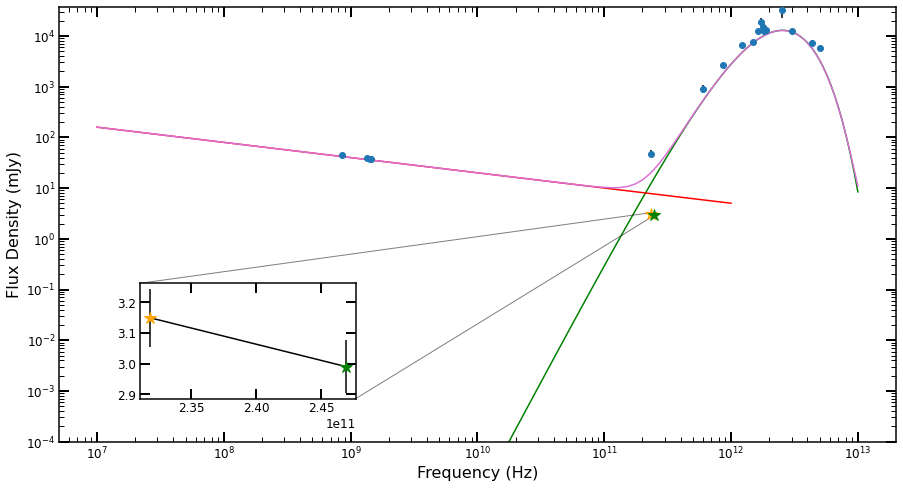

In [21]:
x=plotter(index[i],inter[i],mass[i],temp[i],dist[i],beta[i],LSBfl[i],LSBfre[i],USBfl[i],USBfre[i],SEDy,SEDxe,x0[i],y0[i],h[i],w[i],SEDrms,LSBerr[i],USBerr[i])